In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


Non-Null value is equal for all columns, means no null values. Only date, type and region columns are object, rest all are numeric format

In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Confirmed No null value

In [5]:
len(df['Unnamed: 0'].unique())

52

In [6]:
len(df['Date'].unique())

104

We can see that Unnamed column doesn't signify data column properly as it unique count is not equal to Date unique count.

We can drop Unnamed column as we already have index column

In [7]:
df.drop('Unnamed: 0', 1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df['XLarge Bags'].max()

108072.79

In [9]:
df['Total_Bags'] = df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']

In [10]:
df.loc[df['Total_Bags'] != df['Total Bags'], 'Total_Bags']

6          8318.86
16         7990.10
19        10443.22
24        24431.90
26        26662.08
           ...    
1485    1744793.14
1493    2391861.16
1496    3056112.91
1509      52447.98
1514      62415.77
Name: Total_Bags, Length: 380, dtype: float64

There are rows where Total Bags are not equal to sum of Small Bags, Large Bags and XLarge Bags, so we can't drop any column from these, let's only drop the newly made column Total_Bags.

In [11]:
df.drop(['Total_Bags'],1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df.shape

(1517, 13)

In [13]:
#Let's encode the data of oject types
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

In [14]:
cat_Cols = [i for i in df.columns if df[i].dtypes == 'object']
cat_Cols

['Date', 'type', 'region']

In [15]:
for i in cat_Cols:
    df[i] = le.fit_transform(df[i])

df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,68,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,44,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,18,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,92,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,74,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [17]:
len(df['Date'].unique())

104

In [18]:
df.shape

(1517, 13)

In [19]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,51.166777,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,30.693725,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,23.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,50.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,77.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,103.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


Seems pretty normal, doesn't seems like they have lots of variance

But let's plot boxplot

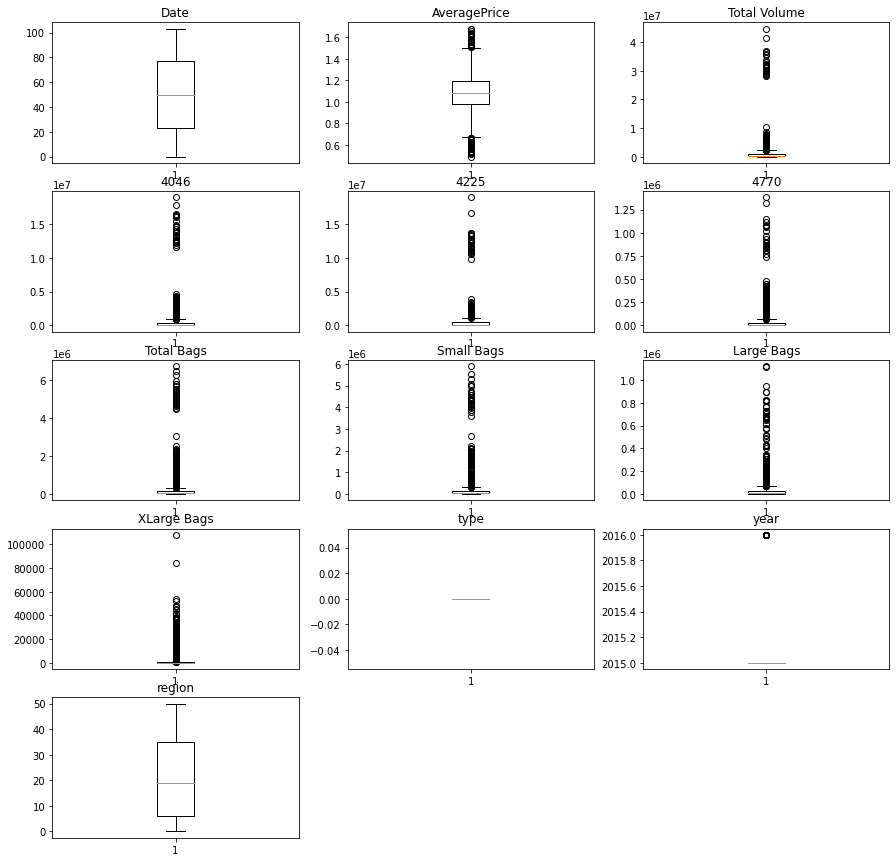

In [20]:
plt.figure(figsize=(15,15))
for i,j in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    plt.boxplot(df[j])
    plt.title(j)

Since almost all the columns having outliers are realistic data and that too having high concentration of outliers, so its better if we don't remove them.

But since values are far too big in many columns, let's scale them using standard scalar. We won't use minmax scalar because there are gaps among outliers itself, generally on the higher percentile side, so using standard scalar will handle better. Then if need be then we can use minmaxscalar

In [21]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,68,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,44,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,18,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,92,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,74,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


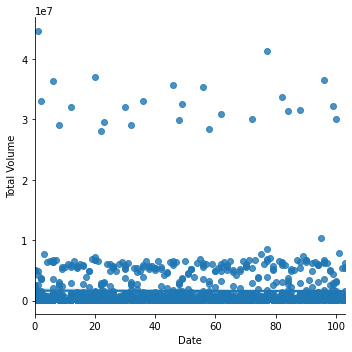

In [22]:
sns.lmplot(x='Date', y='Total Volume', data=df)

Total Sales is not at all dependent on date, as we can see the scatters are uniform throughout X Axis. And the slope is also straight(0).

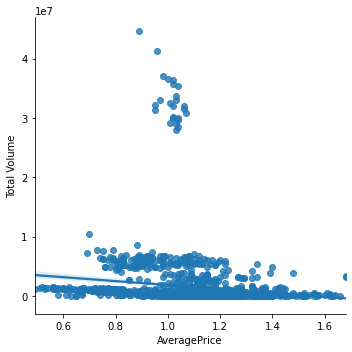

In [23]:
sns.lmplot(x='AveragePrice', y='Total Volume', data=df)

We can see Lower the average price higher the sales, but very little dependency.

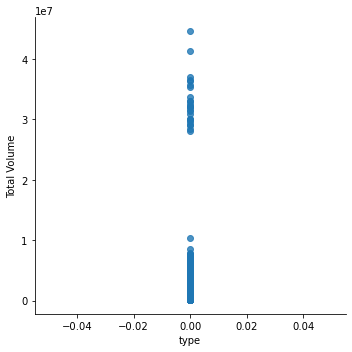

In [24]:
sns.lmplot(x='type', y='Total Volume', data=df)

Not much to infer from this, as there is only 1 type so data is basically concentrated in the 0.00 of the X Axis, so the Volumne can't show how much it depends on this.

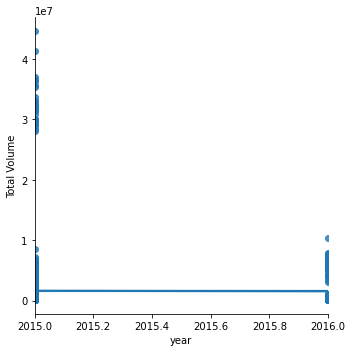

In [25]:
sns.lmplot(x='year', y='Total Volume', data=df)

Year doesn't seem to relate much on Sales Volume

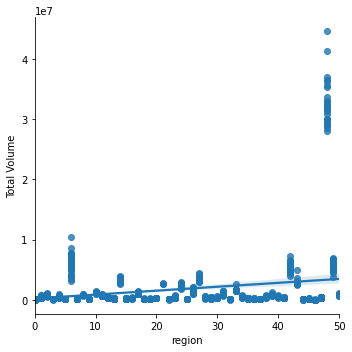

In [26]:
sns.lmplot(x='region', y='Total Volume', data=df)

There are some regions who have higher sales volume

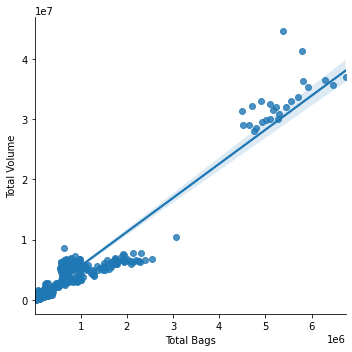

In [27]:
sns.lmplot(x='Total Bags', y='Total Volume', data=df)

Its obvious that number of bags sold will determine the volume hence slope seems 45 degrees(tan 45 = 1.62)

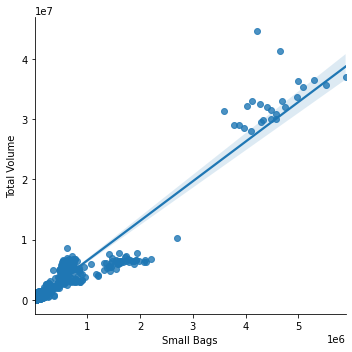

In [28]:
sns.lmplot(x='Small Bags', y='Total Volume', data=df)

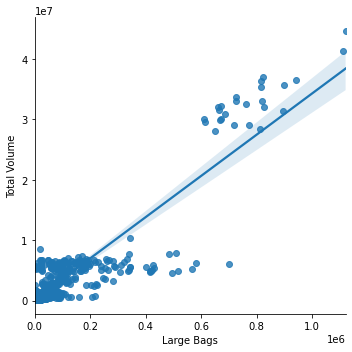

In [29]:
sns.lmplot(x='Large Bags', y='Total Volume', data=df)

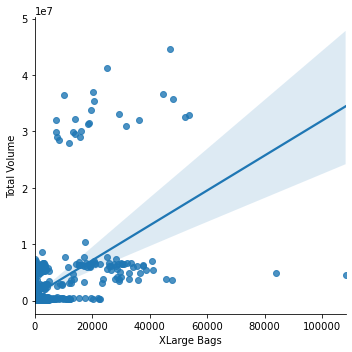

In [30]:
sns.lmplot(x='XLarge Bags', y='Total Volume', data=df)

Let's find out correlation among variables

In [31]:
dfcorr = df.corr()
dfcorr

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.005663,-0.006871,-0.006195,-0.007734,-0.008746,-0.005609,-0.003265,-0.018301,0.003515,NaN,0.006215,-0.018068
AveragePrice,0.005663,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,-0.006871,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,-0.006195,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,-0.007734,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,-0.008746,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,-0.005609,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,-0.003265,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,-0.018301,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,0.003515,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144


Let's drop type columns as it has only one value so it womn't help us.

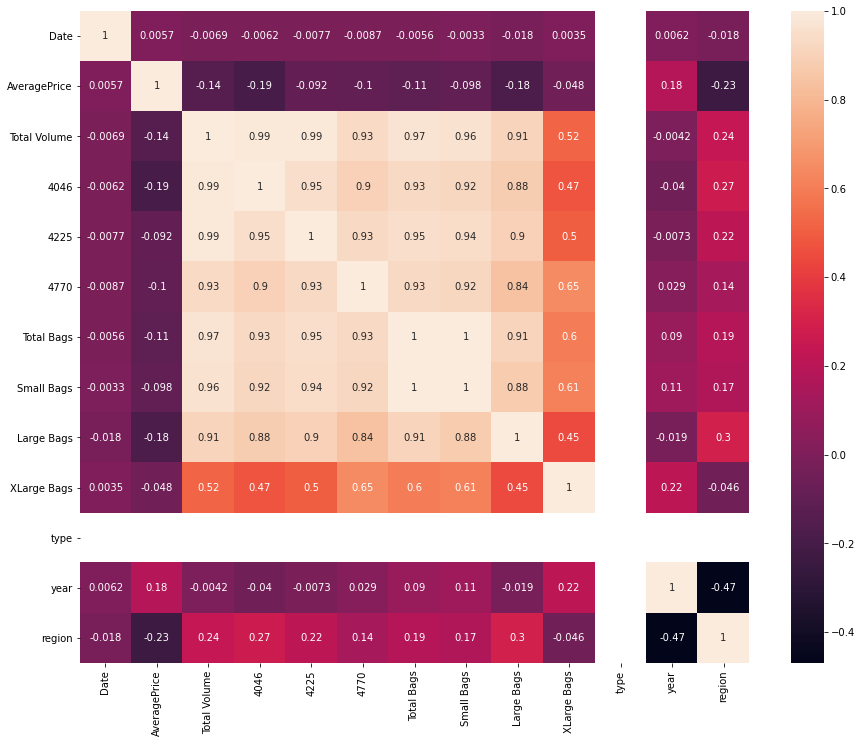

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(dfcorr, annot=True)

XLarge Bage contributr 52% of total sales and Large Bag 91% and Small Bag 96%, hence its safe to say that highest number of bags sizes sold are Small Bags, closely followed by Large Bags, XLarge bag is sold less when compared to Large and Small bags.

Also Small Bag and Total Bag is 100% related as per Heatmap, so we can keep either one of these variables. Also 91% is relation between total bags sld and large bag sold.


We can drop type, large, small bag, and year also since it -.0042(4th part of thousand) related to Volume sales, and 4046, 4225 and 4770(since they are related to each other by more than 93%)

In [33]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

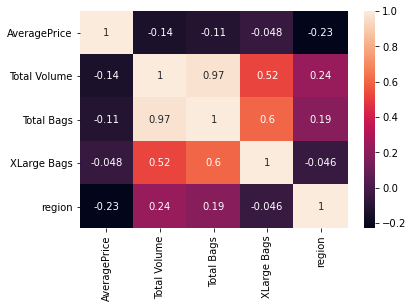

In [34]:
df.drop(['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'type', 'year'], 1, inplace=True)
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True)

Problem Statement says.
The dataset can be seen in two angles to find the city or region and find the average price .

We should give Volumne to our model as an Input and our model should be able to predict Region and Average Price.

Region is Classification problem and Price is Regression problem.
Let's import our models for Classification and Regression.

First let's get our X and cY and rY(cY will be Region and ryY will be Price)

In [35]:
X = df['Total Volume']
cY = df['region']
rY = df['AveragePrice']

# Let's start with Regression(X and rY)

In [36]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [37]:
def classify(model, x, y):
    # Model training
    model.fit(x, y)
    pred = model.predict(x)
    print("MSE is:",mean_squared_error(y,pred))
    #Cross validation
    score = cross_val_score(model, x,y, cv=5)
    print("Cross validation score is :",np.abs(np.mean(score)))
    return np.abs(np.mean(score))

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
mms = MinMaxScaler()
X = mms.fit_transform(df[['Total Volume']])
#X
cY

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [40]:
rY

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [41]:
X1 = pd.DataFrame(X, columns=['Volume'])
X = X1

In [42]:
def rstate(model, Y):
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        rscore.append(r2_score(y_test, pred))
    return rscore.index(max(rscore))+1

#Regression
lm = LinearRegression()
rr = Ridge()
ls = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

#Classification

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
knc = KNeighborsClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()

In [43]:
#Regression Random State calculation
print("----------------------Regression------------------------------")
lmRS = rstate(lm, rY)
print("Linear Model best random state is: ",lmRS)
rrRS = rstate(rr, rY)
print("Ridge Model best random state is: ",rrRS)
lsRS = rstate(ls, rY)
print("Lasso Model best random state is: ",lsRS)
dtrRS = rstate(dtr, rY)
print("Decision Tree Model best random state is: ",dtrRS)
rfrRS = rstate(rfr, rY)
print("Random Forest Model best random state is: ",rfrRS)
etrRS = rstate(etr, rY)
print("Extra Trees Model best random state is: ",etrRS)
gbrRS = rstate(gbr, rY)
print("Gradient Boost Model best random state is: ",gbrRS)
print("------------------------------------------------------------------")
print("")
print("----------------------Classification------------------------------")
#Classification Random State calculation
dtcRS = rstate(dtc, cY)
print("Decision Tree Model best random state is: ",dtcRS)
rfcRS = rstate(rfc, cY)
print("Random Forest Model best random state is: ",rfcRS)
etcRS = rstate(etc, cY)
print("Extra Trees Model best random state is: ",etcRS)
kncRS = rstate(knc, cY)
print("KNN Model best random state is: ",kncRS)
svcRS = rstate(svc, cY)
print("SVM Model best random state is: ",svcRS)

print("------------------------------------------------------------------")

----------------------Regression------------------------------
Linear Model best random state is:  158
Ridge Model best random state is:  158
Lasso Model best random state is:  17
Decision Tree Model best random state is:  141
Random Forest Model best random state is:  6
Extra Trees Model best random state is:  141
Gradient Boost Model best random state is:  6
------------------------------------------------------------------

----------------------Classification------------------------------
Decision Tree Model best random state is:  96
Random Forest Model best random state is:  96
Extra Trees Model best random state is:  96
KNN Model best random state is:  96
SVM Model best random state is:  59
------------------------------------------------------------------


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X,rY,test_size=.3, random_state=lmRS)
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(mean_squared_error(y_test, pred))

0.029456662687653186


In [44]:
#Regression Parameters
rrparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': [rrRS]}
lsparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': [lsRS]}
dtrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'min_samples_split' : range(10),
            'random_state' : [dtrRS]}
rfrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'n_estimators' : range(50,80), 'random_state' : [rfrRS]}
etrparams = {'criterion' : ['mse', 'friedman_mse', 'mae'], 'min_samples_split' : range(10),
            'random_state' : [etrRS]}
gbrparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80),
             'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : [gbrRS]}

#Classification Parameters
dtcparams = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'],
            'min_samples_split' : range(10), 'random_state' : [dtcRS]}
rfcparams = {'criterion' : ['gini', 'entropy'], 'n_estimators' : range(50,80), 'random_state' : [rfcRS]}
etcparams = {'criterion' : ['gini', 'entropy'], 'min_samples_split' : range(10),
            'random_state' : [etcRS]}
kncparams = {'n_neighbors' : range(3,11), 'weights' : ['uniform', 'distance']}
svcparams = {'kernel' : ['linear', 'rbf'], 'C' : range(50,80),
             'random_state' : [svcRS]}
#gbcparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80),
 #            'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : [gbcRS]}

In [45]:
rrgs = GridSearchCV(rr, rrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
rrgs.fit(X, rY)
rrDF = pd.DataFrame(rrgs.cv_results_)
rrDF['mean_test_score'] = np.abs(rrDF['mean_test_score'])
rrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
0,"{'alpha': 0.0001, 'random_state': 158}",0.039405
1,"{'alpha': 0.001, 'random_state': 158}",0.039399
2,"{'alpha': 0.01, 'random_state': 158}",0.039344
3,"{'alpha': 0.1, 'random_state': 158}",0.038841
4,"{'alpha': 1.0, 'random_state': 158}",0.036449


In [46]:
lsgs = GridSearchCV(ls, lsparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
lsgs.fit(X, rY)
lsDF = pd.DataFrame(lsgs.cv_results_)
lsDF['mean_test_score'] = np.abs(lsDF['mean_test_score'])
lsDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
0,"{'alpha': 0.0001, 'random_state': 17}",0.038596
2,"{'alpha': 0.01, 'random_state': 17}",0.035992
3,"{'alpha': 0.1, 'random_state': 17}",0.035992
4,"{'alpha': 1.0, 'random_state': 17}",0.035992
1,"{'alpha': 0.001, 'random_state': 17}",0.035459


In [59]:
dtrgs = GridSearchCV(dtr, dtrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
dtrgs.fit(X, rY)
dtrDF = pd.DataFrame(dtrgs.cv_results_)
dtrDF['mean_test_score'] = np.abs(dtrDF['mean_test_score'])
dtrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)
#param = dtrDF.iloc[0,1]
#print(param)

,params,mean_test_score
2,"{'criterion': 'mse', 'min_samples_split': 2, '...",0.057209
22,"{'criterion': 'mae', 'min_samples_split': 2, '...",0.057209
12,"{'criterion': 'friedman_mse', 'min_samples_spl...",0.057209
13,"{'criterion': 'friedman_mse', 'min_samples_spl...",0.055731
3,"{'criterion': 'mse', 'min_samples_split': 3, '...",0.055724
23,"{'criterion': 'mae', 'min_samples_split': 3, '...",0.055334
4,"{'criterion': 'mse', 'min_samples_split': 4, '...",0.053813
14,"{'criterion': 'friedman_mse', 'min_samples_spl...",0.053802
24,"{'criterion': 'mae', 'min_samples_split': 4, '...",0.053695
25,"{'criterion': 'mae', 'min_samples_split': 5, '...",0.052908


In [61]:
param = dtrDF.iloc[2]
param

mean_fit_time                                                     0.00559444
std_fit_time                                                      0.00135641
mean_score_time                                                   0.00259771
std_score_time                                                   0.000801759
param_criterion                                                          mse
param_min_samples_split                                                    2
param_random_state                                                       141
params                     {'criterion': 'mse', 'min_samples_split': 2, '...
split0_test_score                                                 -0.0528141
split1_test_score                                                 -0.0411026
split2_test_score                                                 -0.0756142
split3_test_score                                                 -0.0451386
split4_test_score                                                 -0.0713757

In [48]:
gbrgs = GridSearchCV(gbr, gbrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
gbrgs.fit(X, rY)
gbrDF = pd.DataFrame(gbrgs.cv_results_)
gbrDF['mean_test_score'] = np.abs(gbrDF['mean_test_score'])
gbrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
359,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",0.084170
358,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",0.084170
357,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",0.084169
356,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",0.084169
355,"{'criterion': 'mae', 'loss': 'quantile', 'n_es...",0.084169
...,...,...
274,"{'criterion': 'mae', 'loss': 'lad', 'n_estimat...",0.034478
273,"{'criterion': 'mae', 'loss': 'lad', 'n_estimat...",0.034367
272,"{'criterion': 'mae', 'loss': 'lad', 'n_estimat...",0.034191
271,"{'criterion': 'mae', 'loss': 'lad', 'n_estimat...",0.034074


In [62]:
param = gbrDF.iloc[359]
param

mean_fit_time                                                  0.935259
std_fit_time                                                  0.0715785
mean_score_time                                              0.00200272
std_score_time                                              8.14401e-06
param_criterion                                                     mae
param_loss                                                     quantile
param_n_estimators                                                   79
param_random_state                                                    6
params                {'criterion': 'mae', 'loss': 'quantile', 'n_es...
split0_test_score                                            -0.0568059
split1_test_score                                            -0.0903392
split2_test_score                                             -0.105298
split3_test_score                                            -0.0835564
split4_test_score                                            -0.

In [49]:
etrgs = GridSearchCV(etr, etrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
etrgs.fit(X, rY)
etrDF = pd.DataFrame(etrgs.cv_results_)
etrDF['mean_test_score'] = np.abs(etrDF['mean_test_score'])
etrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
2,"{'criterion': 'mse', 'min_samples_split': 2, '...",0.049648
12,"{'criterion': 'friedman_mse', 'min_samples_spl...",0.049646
22,"{'criterion': 'mae', 'min_samples_split': 2, '...",0.049470
23,"{'criterion': 'mae', 'min_samples_split': 3, '...",0.045635
13,"{'criterion': 'friedman_mse', 'min_samples_spl...",0.045614
3,"{'criterion': 'mse', 'min_samples_split': 3, '...",0.045611
24,"{'criterion': 'mae', 'min_samples_split': 4, '...",0.042881
14,"{'criterion': 'friedman_mse', 'min_samples_spl...",0.042740
4,"{'criterion': 'mse', 'min_samples_split': 4, '...",0.042724
25,"{'criterion': 'mae', 'min_samples_split': 5, '...",0.041555


In [63]:
param = etrDF.iloc[2]
param

mean_fit_time                                                       0.230868
std_fit_time                                                       0.0712699
mean_score_time                                                    0.0143911
std_score_time                                                   0.000489921
param_criterion                                                          mse
param_min_samples_split                                                    2
param_random_state                                                       141
params                     {'criterion': 'mse', 'min_samples_split': 2, '...
split0_test_score                                                 -0.0421398
split1_test_score                                                 -0.0329358
split2_test_score                                                 -0.0668881
split3_test_score                                                 -0.0398849
split4_test_score                                                 -0.0663905

In [50]:
rfrgs = GridSearchCV(rfr, rfrparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
rfrgs.fit(X, rY)
rfrDF = pd.DataFrame(rfrgs.cv_results_)
rfrDF['mean_test_score'] = np.abs(rfrDF['mean_test_score'])
rfrDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
10,"{'criterion': 'mse', 'n_estimators': 60, 'rand...",0.045426
40,"{'criterion': 'friedman_mse', 'n_estimators': ...",0.045426
11,"{'criterion': 'mse', 'n_estimators': 61, 'rand...",0.045423
41,"{'criterion': 'friedman_mse', 'n_estimators': ...",0.045423
7,"{'criterion': 'mse', 'n_estimators': 57, 'rand...",0.045416
...,...,...
115,"{'criterion': 'poisson', 'n_estimators': 75, '...",NaN
116,"{'criterion': 'poisson', 'n_estimators': 76, '...",NaN
117,"{'criterion': 'poisson', 'n_estimators': 77, '...",NaN
118,"{'criterion': 'poisson', 'n_estimators': 78, '...",NaN


In [64]:
param = rfrDF.iloc[10]
param

mean_fit_time                                                  0.148515
std_fit_time                                                 0.00354225
mean_score_time                                              0.00879512
std_score_time                                              0.000399637
param_criterion                                                     mse
param_n_estimators                                                   60
param_random_state                                                    6
params                {'criterion': 'mse', 'n_estimators': 60, 'rand...
split0_test_score                                            -0.0388995
split1_test_score                                            -0.0270048
split2_test_score                                            -0.0643175
split3_test_score                                            -0.0333148
split4_test_score                                            -0.0635953
mean_test_score                                               0.

In [51]:
dtcgs = GridSearchCV(dtc, dtcparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
dtcgs.fit(X, cY)
dtcDF = pd.DataFrame(dtcgs.cv_results_)
dtcDF['mean_test_score'] = np.abs(dtcDF['mean_test_score'])
dtcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
31,"{'criterion': 'entropy', 'min_samples_split': ...",468.541693
11,"{'criterion': 'gini', 'min_samples_split': 5, ...",468.541693
37,"{'criterion': 'entropy', 'min_samples_split': ...",466.930495
17,"{'criterion': 'gini', 'min_samples_split': 8, ...",466.930495
18,"{'criterion': 'gini', 'min_samples_split': 9, ...",463.156772
16,"{'criterion': 'gini', 'min_samples_split': 8, ...",462.243432
25,"{'criterion': 'entropy', 'min_samples_split': ...",460.278322
5,"{'criterion': 'gini', 'min_samples_split': 2, ...",460.278322
14,"{'criterion': 'gini', 'min_samples_split': 7, ...",459.948760
4,"{'criterion': 'gini', 'min_samples_split': 2, ...",459.153993


In [66]:
param = rfcDF.iloc[16]
param

mean_fit_time                                                  0.241662
std_fit_time                                                 0.00542626
mean_score_time                                               0.0169905
std_score_time                                              0.000893616
param_criterion                                                    gini
param_n_estimators                                                   66
param_random_state                                                   96
params                {'criterion': 'gini', 'n_estimators': 66, 'ran...
split0_test_score                                              -495.086
split1_test_score                                              -441.691
split2_test_score                                              -421.455
split3_test_score                                              -474.373
split4_test_score                                              -465.974
mean_test_score                                                 

In [52]:
rfcgs = GridSearchCV(rfc, rfcparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
rfcgs.fit(X, cY)
rfcDF = pd.DataFrame(rfcgs.cv_results_)
rfcDF['mean_test_score'] = np.abs(rfcDF['mean_test_score'])
rfcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
16,"{'criterion': 'gini', 'n_estimators': 66, 'ran...",459.715659
50,"{'criterion': 'entropy', 'n_estimators': 70, '...",459.715659
48,"{'criterion': 'entropy', 'n_estimators': 68, '...",459.715659
47,"{'criterion': 'entropy', 'n_estimators': 67, '...",459.715659
46,"{'criterion': 'entropy', 'n_estimators': 66, '...",459.715659
20,"{'criterion': 'gini', 'n_estimators': 70, 'ran...",459.715659
18,"{'criterion': 'gini', 'n_estimators': 68, 'ran...",459.715659
17,"{'criterion': 'gini', 'n_estimators': 67, 'ran...",459.715659
0,"{'criterion': 'gini', 'n_estimators': 50, 'ran...",459.443467
43,"{'criterion': 'entropy', 'n_estimators': 63, '...",459.443467


In [53]:
etcgs = GridSearchCV(etc, etcparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
etcgs.fit(X, cY)
etcDF = pd.DataFrame(etcgs.cv_results_)
etcDF['mean_test_score'] = np.abs(etcDF['mean_test_score'])
etcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
3,"{'criterion': 'gini', 'min_samples_split': 3, ...",463.966979
13,"{'criterion': 'entropy', 'min_samples_split': ...",463.966979
2,"{'criterion': 'gini', 'min_samples_split': 2, ...",458.449279
12,"{'criterion': 'entropy', 'min_samples_split': ...",458.449279
4,"{'criterion': 'gini', 'min_samples_split': 4, ...",457.898335
14,"{'criterion': 'entropy', 'min_samples_split': ...",457.898335
5,"{'criterion': 'gini', 'min_samples_split': 5, ...",456.498584
15,"{'criterion': 'entropy', 'min_samples_split': ...",456.498584
9,"{'criterion': 'gini', 'min_samples_split': 9, ...",455.263342
19,"{'criterion': 'entropy', 'min_samples_split': ...",455.263342


In [67]:
param = etcDF.iloc[3]
param

mean_fit_time                                                       0.346402
std_fit_time                                                       0.0658743
mean_score_time                                                    0.0329832
std_score_time                                                    0.00675084
param_criterion                                                         gini
param_min_samples_split                                                    3
param_random_state                                                        96
params                     {'criterion': 'gini', 'min_samples_split': 3, ...
split0_test_score                                                   -506.868
split1_test_score                                                   -424.158
split2_test_score                                                   -459.706
split3_test_score                                                   -470.267
split4_test_score                                                   -458.835

In [54]:
kncgs = GridSearchCV(knc, kncparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
kncgs.fit(X, cY)
kncDF = pd.DataFrame(kncgs.cv_results_)
kncDF['mean_test_score'] = np.abs(kncDF['mean_test_score'])
kncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
11,"{'n_neighbors': 8, 'weights': 'distance'}",468.627790
13,"{'n_neighbors': 9, 'weights': 'distance'}",466.442429
9,"{'n_neighbors': 7, 'weights': 'distance'}",466.364804
3,"{'n_neighbors': 4, 'weights': 'distance'}",466.300476
15,"{'n_neighbors': 10, 'weights': 'distance'}",465.174772
7,"{'n_neighbors': 6, 'weights': 'distance'}",464.851296
1,"{'n_neighbors': 3, 'weights': 'distance'}",464.357217
8,"{'n_neighbors': 7, 'weights': 'uniform'}",463.633425
10,"{'n_neighbors': 8, 'weights': 'uniform'}",462.717820
2,"{'n_neighbors': 4, 'weights': 'uniform'}",461.235602


In [69]:
param = svcDF.iloc[0]
param

mean_fit_time                                                 0.0381777
std_fit_time                                                  0.0049223
mean_score_time                                               0.0209885
std_score_time                                              8.39558e-07
param_C                                                              50
param_kernel                                                     linear
param_random_state                                                   59
params                {'C': 50, 'kernel': 'linear', 'random_state': 59}
split0_test_score                                              -629.132
split1_test_score                                              -630.882
split2_test_score                                              -628.257
split3_test_score                                              -623.149
split4_test_score                                              -624.967
mean_test_score                                                 

In [55]:
svcgs = GridSearchCV(svc, svcparams,return_train_score = False, cv = 5, scoring='neg_mean_squared_error')
svcgs.fit(X, cY)
svcDF = pd.DataFrame(svcgs.cv_results_)
svcDF['mean_test_score'] = np.abs(svcDF['mean_test_score'])
svcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
0,"{'C': 50, 'kernel': 'linear', 'random_state': 59}",627.277219
2,"{'C': 51, 'kernel': 'linear', 'random_state': 59}",625.342192
4,"{'C': 52, 'kernel': 'linear', 'random_state': 59}",625.046483
6,"{'C': 53, 'kernel': 'linear', 'random_state': 59}",624.629321
8,"{'C': 54, 'kernel': 'linear', 'random_state': 59}",624.197169
10,"{'C': 55, 'kernel': 'linear', 'random_state': 59}",623.657495
12,"{'C': 56, 'kernel': 'linear', 'random_state': 59}",623.059102
14,"{'C': 57, 'kernel': 'linear', 'random_state': 59}",622.353839
16,"{'C': 58, 'kernel': 'linear', 'random_state': 59}",621.505776
18,"{'C': 59, 'kernel': 'linear', 'random_state': 59}",620.738119


As we can see for Regression the best model working is GradientBoosting Regressor with parameters as ('criterion': 'mae', 'loss': 'quantile', 'n_estimators': 79, 'random_state': 6)

And for Classification the best model working is SVC Classifier with parameters as ('C': 50, 'kernel': 'linear', 'random_state': 59)

# Let's save the best models in pickle

In [98]:
gbr = GradientBoostingRegressor(criterion= 'mae', loss= 'quantile', n_estimators= 79, random_state= 6)

In [99]:
svc = SVC(C= 50, kernel= 'linear', random_state= 59)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, rY, test_size=.3, random_state= 6)

In [101]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(criterion='mae', loss='quantile', n_estimators=79,
                          random_state=6)

In [102]:
pred = gbr.predict(x_test)

In [103]:
score = cross_val_score(gbr, X,rY, cv=5)
print("---------------------------------------------------------------------------------------------")
print("Mean Squared Error is:",mean_squared_error(y_test, pred))
print("Root Mean Squared Error is:",np.sqrt(mean_squared_error(y_test, pred)))
print("Mean Absolute Error is:",mean_absolute_error(y_test, pred))
print("R2 score is:",r2_score(y_test, pred))
print("Cross validation score is:",np.mean(score))

---------------------------------------------------------------------------------------------
Mean Squared Error is: 0.07997084768865635
Root Mean Squared Error is: 0.2827911732863251
Mean Absolute Error is: 0.2306946046096543
R2 score is: -0.9913565611932453
Cross validation score is: -1.8909767791453376


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, cY, test_size=.3, random_state= 59)

In [105]:
svc.fit(x_train, y_train)

SVC(C=50, kernel='linear', random_state=59)

In [106]:
pred = svc.predict(x_test)
from sklearn.metrics import accuracy_score

In [107]:
score = cross_val_score(svc, X,cY, cv=5)
print("---------------------------------------------------------------------------------------------")
print("Accuracy is:",accuracy_score(y_test, pred))
print("Cross validation score is:",np.mean(score))

---------------------------------------------------------------------------------------------
Accuracy is: 0.1074561403508772
Cross validation score is: 0.11865120722598574


In [108]:
import pickle as pk

In [109]:
with open('Evaluation_Pickle', 'wb') as f:
    pk.dump(gbr,f)

In [110]:
with open('Evaluation_Pickle', 'wb') as f1:
    pk.dump(svc,f1)